In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
rnd = np.random
rnd.seed(0)

In [4]:
n = 10 #number of customers
xc = rnd.rand(n)*200
yc = rnd.rand(n)*100

m = 3  #numebr of facilities
xf = rnd.rand(m)*200
yf = rnd.rand(m)*100

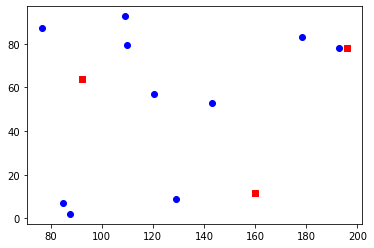

In [5]:
plt.scatter(xc[0:], yc[0:], c='b')
plt.scatter(xf[0:], yf[0:], c='r',marker='s')
plt.show()

In [6]:
I = [i for i in range(0, n)]
J = [i for i in range(0, m)]
h = {i: rnd.randint(1, 10) for i in I}
A = [(i, j) for i in I for j in J]
f = {j: 50 for j in J}
c = {(i, j): 1*np.hypot(xc[i]-xf[j], yc[i]-yf[j]) for (i, j) in A}

In [7]:
from gurobipy import Model, GRB, quicksum

In [8]:
mdl = Model('UFLP')

Using license file C:\Users\amirm\gurobi.lic
Academic license - for non-commercial use only


In [9]:
x = mdl.addVars(J, vtype = GRB.BINARY)
y = mdl.addVars(A, vtype = GRB.CONTINUOUS)

In [10]:
mdl.ModelSense = GRB.MINIMIZE
mdl.setObjective(quicksum(f[j]*x[j] for j in J) + quicksum(h[i]*c[i,j]*y[i,j] for i,j in A))

In [11]:
mdl.addConstrs(quicksum(y[i,j] for j in J) == 1 for i in I);
mdl.addConstrs(y[i,j] <= x[j] for i,j in A);
mdl.addConstrs(y[i,j] >= 0 for i,j in A);

In [12]:
mdl.optimize()

Gurobi Optimizer version 9.0.3 build v9.0.3rc0 (win64)
Optimize a model with 70 rows, 33 columns and 120 nonzeros
Model fingerprint: 0xf16a7a35
Variable types: 30 continuous, 3 integer (3 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e+00, 8e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 0 columns
Presolve time: 0.02s
Presolved: 40 rows, 33 columns, 90 nonzeros
Variable types: 30 continuous, 3 integer (3 binary)

Root relaxation: objective 1.525802e+03, 4 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0    1525.8023159 1525.80232  0.00%     -    0s

Explored 0 nodes (4 simplex iterations) in 0.10 seconds
Thread count was 4 (of 4 available processors)

Solution count 1: 1525.8 

Optimal solution found (tolerance 1.00e-04)
Best objective 1

In [13]:
assignment = [a for a in A if y[a].X>0.0]

In [14]:
assignment

[(0, 2),
 (1, 1),
 (2, 2),
 (3, 2),
 (4, 2),
 (5, 1),
 (6, 2),
 (7, 0),
 (8, 0),
 (9, 2)]

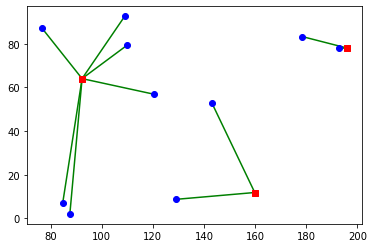

In [15]:
for i, j in assignment:
    plt.plot([xc[i], xf[j]], [yc[i], yf[j]], c='g', zorder=0)
plt.scatter(xc[0:], yc[0:], c='b')
plt.scatter(xf[0:], yf[0:], c='r',marker='s')